In [119]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [120]:
import warnings
warnings.filterwarnings("ignore")

# Reading Basic Info About Data

In [121]:
# pd.read_excel('gemstone.csv')

In [122]:
df = pd.read_csv('E:/first/data/gemstone.csv')

In [123]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


- total datapoints are 26967
- There are three Object type features [cut, color, clarity]
- There are 6 Numerical type features [carat, depth, table, x, y, z, price]
- Obvious, Price is target column.

In [125]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

- Oops, there are 697 missing values present in depth feature.
- No worries, We can handle this.

In [126]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


- Just take some idea about mean, median, min, max

#### Conclusion about dataset

- dataset has id feature, which is totally waste for any information.
- has some null values.
- There are three features need to be converted into numerical feature for model training purpose.

# Feature engineering

Feature engineering is a crucial step in the data science process that involves transforming raw data into meaningful features that can improve the performance of machine learning models. By selecting, creating, or transforming features, data scientists aim to enhance the representation of the data and enable the models to better understand patterns and make accurate predictions.

Effective feature engineering requires a combination of domain knowledge, creativity, and data exploration techniques. Some common techniques used in feature engineering include:

## Feature Selection

1. Heatmap
A heatmap is a graphical representation of data where values in a matrix are visualized using a color gradient. Heatmaps are commonly used to display relationships, patterns, or variations in data across two dimensions.

2. Correlation 
Correlation is a statistical measure that quantifies the relationship between two variables. It indicates the extent to which changes in one variable are associated with changes in another variable. The correlation coefficient, typically denoted by "r," ranges from -1 to 1, where:

- A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases linearly.
- A correlation coefficient of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases linearly.
- A correlation coefficient of 0 indicates no linear relationship between the variables


<Axes: >

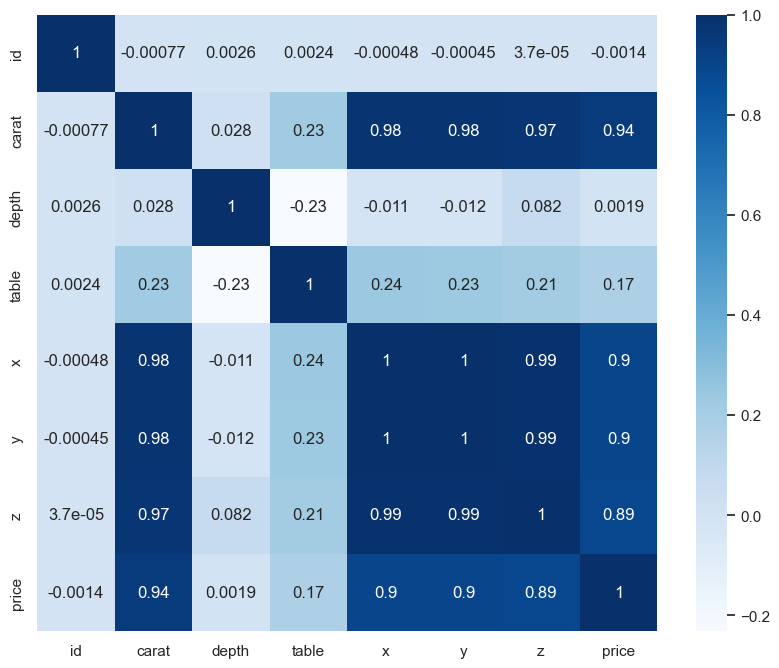

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='Blues')

Highly correlated features can introduce multicollinearity, which can negatively impact the performance of certain machine learning algorithms and make it harder to interpret the importance of individual features.
so we can drop features with more correlation.

In [128]:
def get_high_correlation_features(data, threshold):
    # Compute the correlation matrix
    correlation_matrix = data.corr(numeric_only = True)
    
    # Find features with correlation greater than the threshold
    high_corr_features = set()
    for row in correlation_matrix.columns:
        for col in correlation_matrix.columns:
            if(correlation_matrix[row][col] > threshold and row != col):
                high_corr_features.add(row)
    
    return high_corr_features

The function get_high_correlation_features takes a dataset and a correlation threshold as input.
It computes the correlation matrix of the dataset and identifies features with correlation coefficients greater than the threshold, excluding self-correlations.
It returns a set of the high correlation features found.

In [129]:
high_correlated_features = get_high_correlation_features(df.drop(['price'], axis = 1),0.85)
high_correlated_features

{'carat', 'x', 'y', 'z'}

In [130]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

Four of these features are highly correlated, so we consider to drop x, y, z from dataset.

In [131]:
df = df.drop(['x', 'y', 'z'], axis = 1)
# df = df.drop(['Unnamed: 0'], axis = 1)

- Also see there is a Extra column named as Unnamed: 0
- we also dropped it

## Feature Encoding
Converting categorical variables into numerical representations that can be understood by machine learning algorithms. This can involve techniques like one-hot encoding, label encoding, or ordinal encoding.

In [132]:
df.head()

,id,carat,cut,color,clarity,depth,table,price
0,0,1.52,Premium,F,VS2,62.2,58.0,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,666
4,4,1.70,Premium,G,VS2,62.6,59.0,14453


- cut, color, clarity should be converted

In [133]:
# Unique value for these three features
print('Unique values for diamond cut :', df['cut'].unique())
print('Unique values for diamond color :', df['color'].unique())
print('Unique values for diamond clarity :', df['clarity'].unique())

Unique values for diamond cut : ['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']
Unique values for diamond color : ['F' 'J' 'G' 'E' 'D' 'H' 'I']
Unique values for diamond clarity : ['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']


- Without Domain Expert, we cannot properly encode it.
So we use Internet 

from website :- https://www.brilliantearth.com/diamond/buying-guide/carat/?gclid=Cj0KCQjwl92XBhC7ARIsAHLl9an3M1BVcdpYQzZX08KIkOpJLcEo2VFAh0VFpSUsvATY73afBxGyVO4aAkYJEALw_wcB


- We Got

Cut grading
Diamonds are graded into the following cuts:(best to worst)

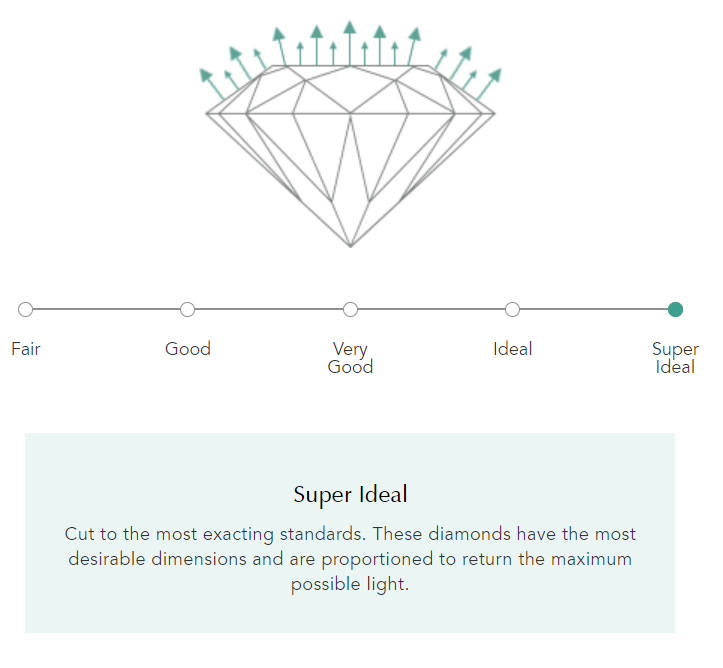

In [134]:
# Labeling cut based on given list 
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
df['cut'] = df['cut'].map(cut_map)

Price vs color: the exception of fancy color diamonds

from website :- https://mydiamondring.com/en/article/830429

- We Got
Diamonds are valued by how closely they come to being colorless. The less color, the higher their value.

- D, E, F: are colorless
- G, H, I, J: are near-colorless

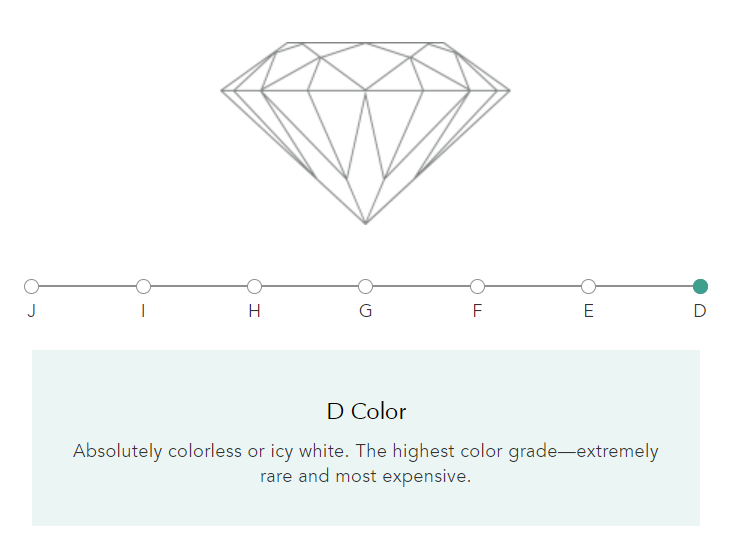

In [135]:
# Labeling color based on given list 
df['color'] = df['color'].map({"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7})


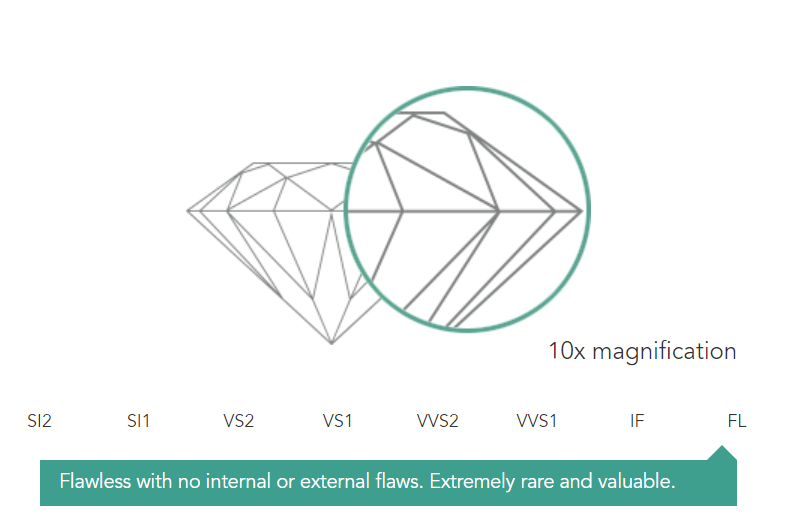

In [136]:
# Labeling clarity based on given list
df['clarity'] = df['clarity'].map({"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8})

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  int64  
 3   color    193573 non-null  int64  
 4   clarity  193573 non-null  int64  
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   price    193573 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 11.8 MB


Now we can all the features in numerical datatype

# Handling Missing Values:
Dealing with missing data by imputing or filling in the missing values using various methods like mean imputation, median imputation, or sophisticated imputation techniques such as K-nearest neighbors (KNN) or regression imputation.

- We have a column 'depth', which has 697 missing values.

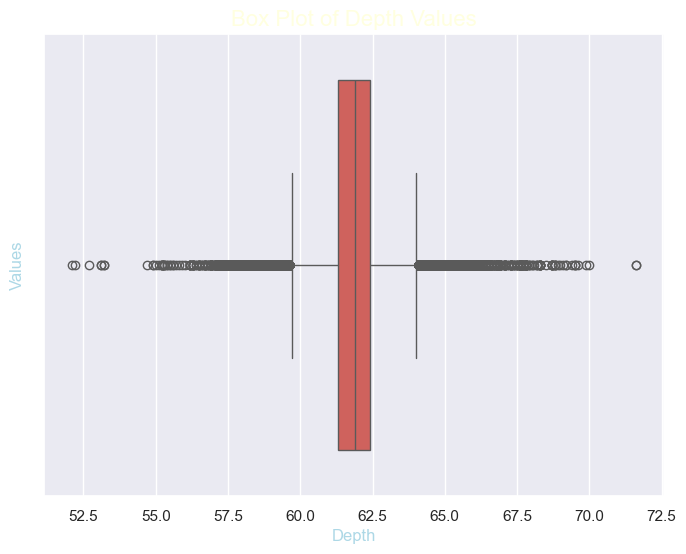

In [138]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set a Seaborn theme with a dark background for contrast
sns.set_theme(style="darkgrid")

# Define a vibrant custom color palette using 'Spectral'
custom_palette = sns.color_palette("Spectral", as_cmap=False)

# Create a figure with a defined size
plt.figure(figsize=(8, 6))

# Create a box plot to visualize the 'depth' data with a custom color palette
sns.boxplot(x=df['depth'], palette=custom_palette)

# Add labels and title with customized font sizes and colors
plt.xlabel('Depth', fontsize=12, color='lightblue')
plt.ylabel('Values', fontsize=12, color='lightblue')
plt.title('Box Plot of Depth Values', fontsize=16, color='lightyellow')

# Display the plot
plt.show()


- It indicates that there are extreme values or observations that deviate significantly from the central tendency of the data in both the positive and negative directions.

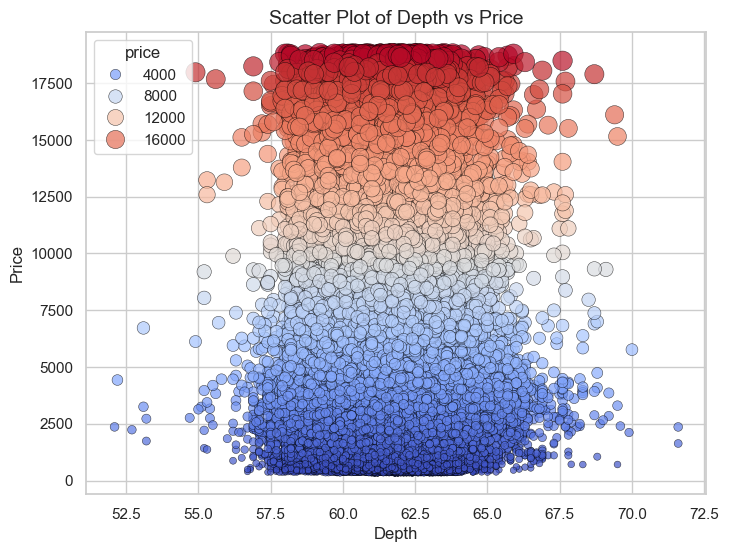

In [139]:
# Set a Seaborn theme for consistent styling
sns.set_theme(style="whitegrid")

# Create a figure with a defined size
plt.figure(figsize=(8, 6))

# Create a scatter plot with enhanced aesthetics
sns.scatterplot(x=df['depth'], y=df['price'], 
                palette='coolwarm',  # Apply a vibrant color palette
                hue=df['price'],     # Color points based on price
                size=df['price'],    # Vary point sizes by price
                sizes=(20, 200),     # Set a range for point sizes
                alpha=0.7,           # Make points slightly transparent
                edgecolor='black')    # Add a black edge to the points

# Add labels and a title with customized font sizes
plt.xlabel('Depth', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot of Depth vs Price', fontsize=14)

# Display the plot
plt.show()


In [140]:
print('Mean for depth :', df['depth'].mean())
print('Median for depth :', df['depth'].median())

Mean for depth : 61.82057415032056
Median for depth : 61.9


There is not significance difference between mean and median.
So, choosing mean to fill the missing value would be right.

In [141]:
df['depth'].fillna(df['depth'].mean(), inplace=True)

In [142]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

We handled null values

# Visualization

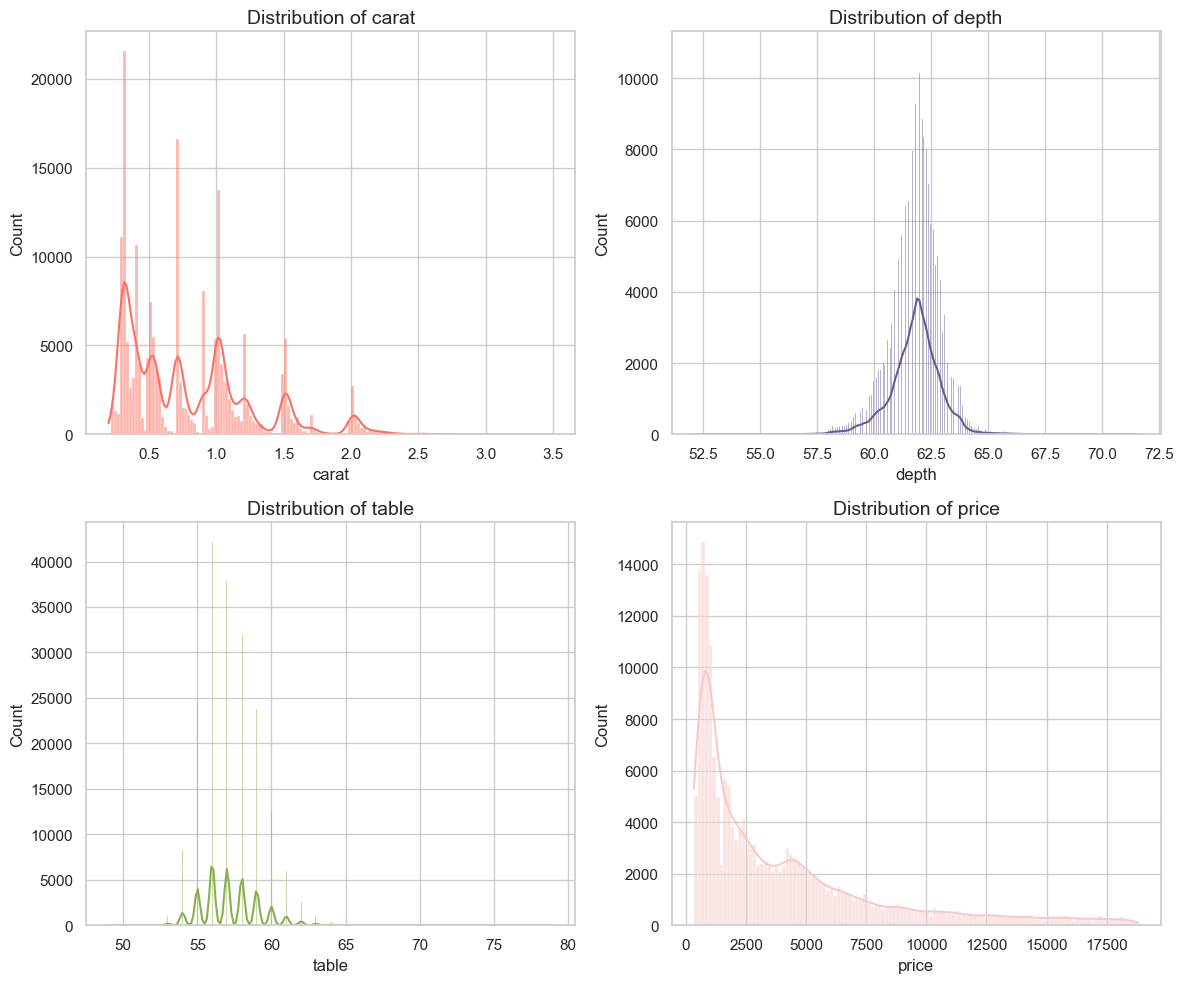

In [143]:
# Define the features for plotting
features = ['carat', 'depth', 'table', 'price']

# Set the figure size to accommodate multiple plots
plt.figure(figsize=(12, 10))

# Define a custom color palette for variety
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Iterate through each feature and create histograms with KDE
for index, feature in enumerate(features):
    plt.subplot(2, 2, index + 1)  # Arrange plots in a 2x2 grid
    sns.histplot(data=df, x=feature, kde=True, color=colors[index])
    
    # Set title for each subplot
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display all plots at once
plt.show()


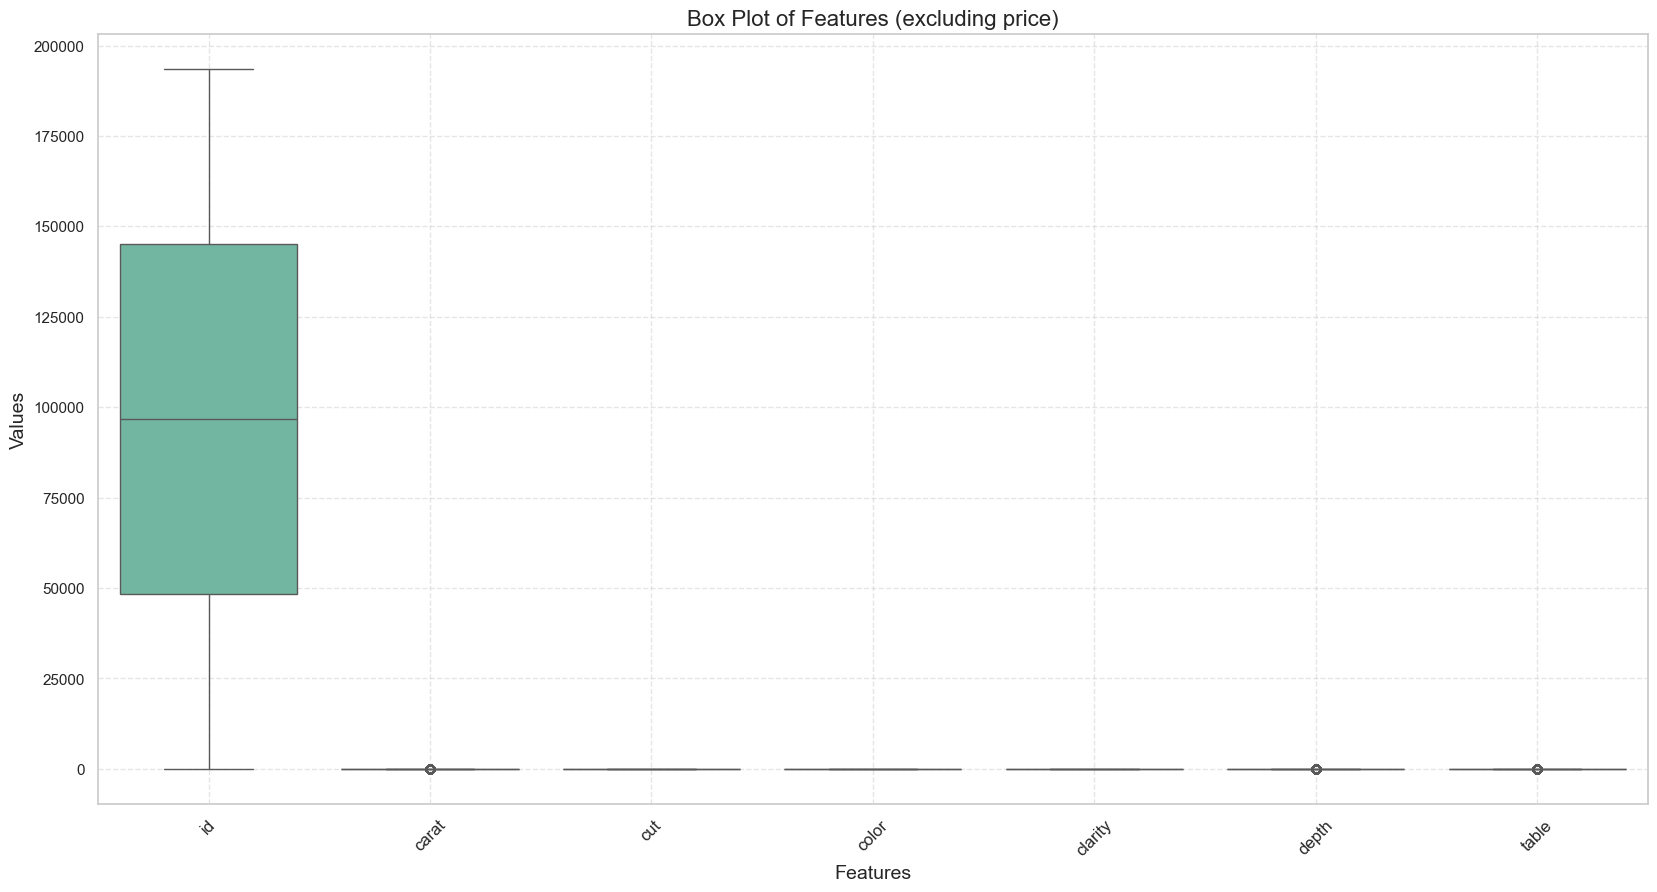

In [144]:
# Set the figure size for a larger, more readable plot
plt.figure(figsize=(20, 10))

# Create a boxplot for all features except 'price'
sns.boxplot(data=df.drop(['price'], axis=1), palette='Set2')

# Customize labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Box Plot of Features (excluding price)', fontsize=16)

# Improve the layout and appearance
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines for clarity

# Display the plot
plt.show()


- Box plot shows outlier in both the directions.

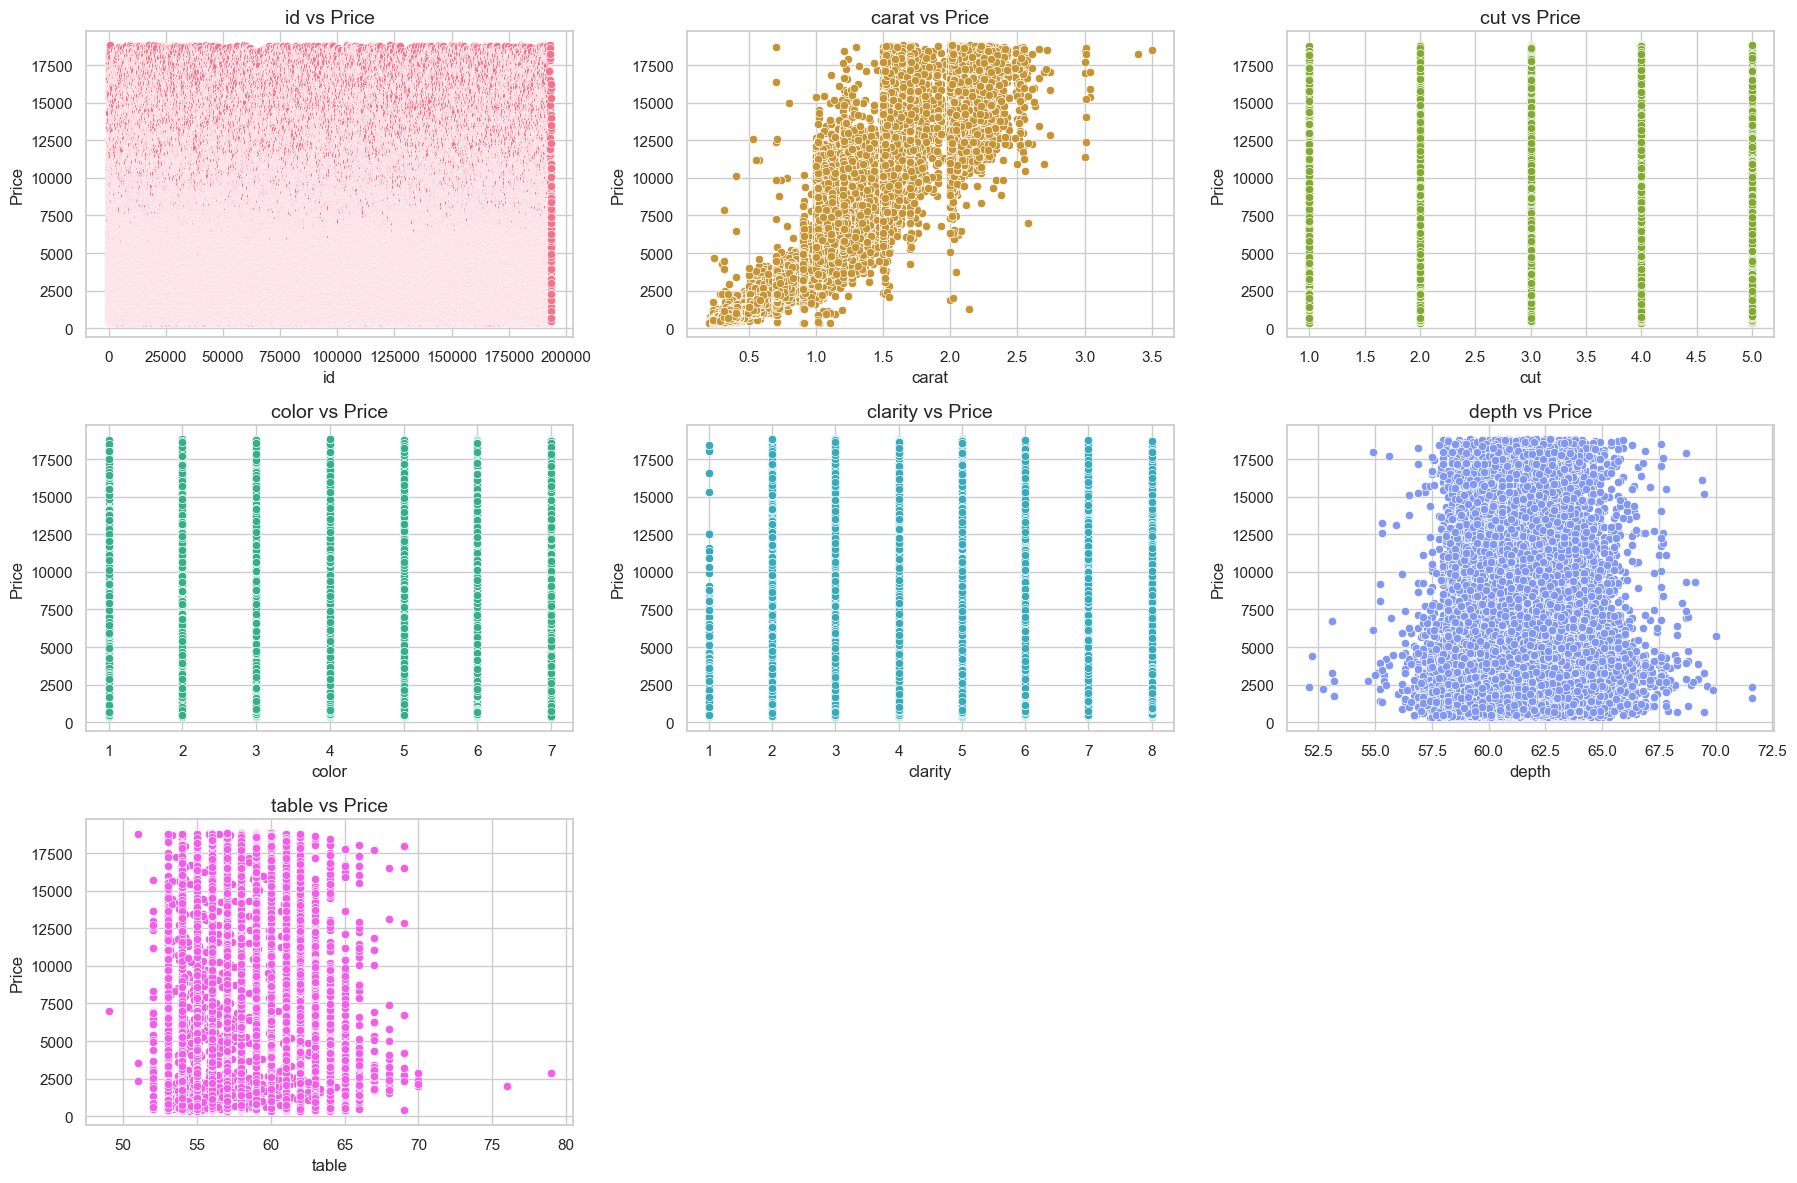

In [145]:

# Set the number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

# Create a figure and subplots with a larger size for clarity
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))

# Flatten the axes array to iterate over the subplots
axes = axes.flatten()

# Define a color palette for the scatter plots
colors = sns.color_palette("husl", len(df.columns)-1)  # Husl for variety

# Loop through each feature (excluding 'price') and create scatter plots
for i, (feature, color) in enumerate(zip(df.columns, colors)):
    if feature != 'price':
        sns.scatterplot(x=df[feature], y=df['price'], ax=axes[i], color=color)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Price', fontsize=12)
        axes[i].set_title(f'{feature} vs Price', fontsize=14)

# Remove any empty subplots if the number of features is not divisible by n_cols
for j in range(len(df.columns)-1, len(axes)):
    fig.delaxes(axes[j])

# Adjust spacing between subplots to avoid overlap
fig.tight_layout()

# Display the plot
plt.show()


- Carat has some linear relation type with price.

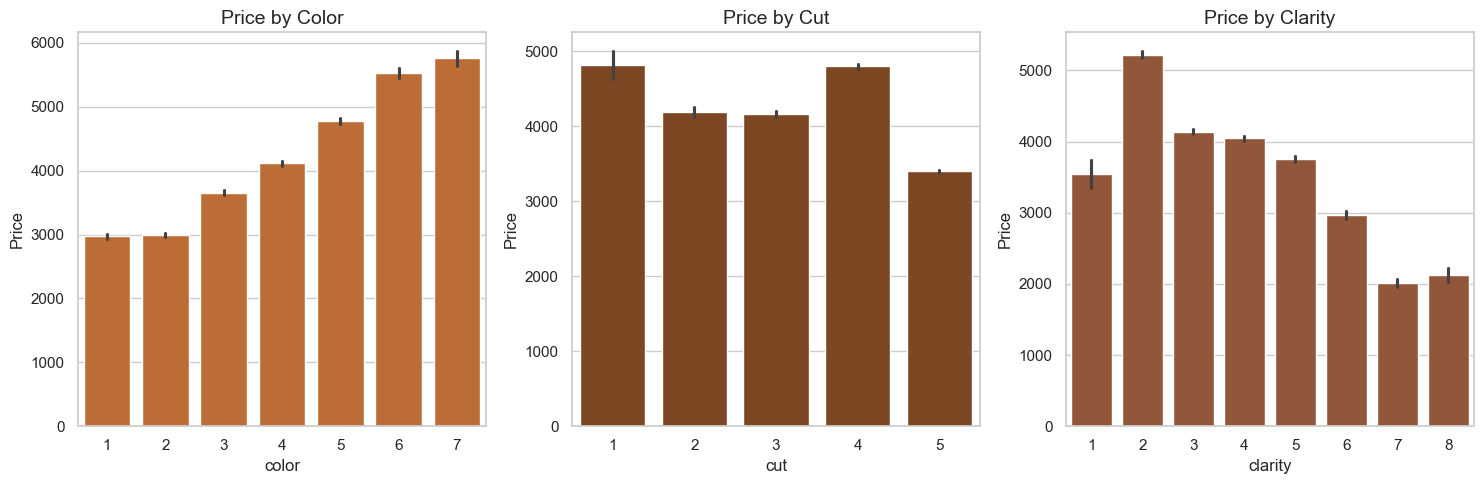

In [146]:
# Define the number of columns and rows for the subplots
n_cols = 3
n_rows = 1

# Create a figure and subplots with a size suitable for 3 bar plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5))
axes = axes.flatten()

# Define a custom color for each bar plot to make it more visually appealing
colors = ['#D2691E', '#8B4513', '#A0522D']  # Brown tones for a warm, cohesive theme

# Create bar plots for 'color', 'cut', and 'clarity'
for i, (feature, color) in enumerate(zip(['color', 'cut', 'clarity'], colors)):
    sns.barplot(x=feature, y='price', data=df, ax=axes[i], color=color)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)
    axes[i].set_title(f'Price by {feature.capitalize()}', fontsize=14)

# Adjust subplots to ensure they don’t overlap
fig.tight_layout()

# Display the plot
plt.show()


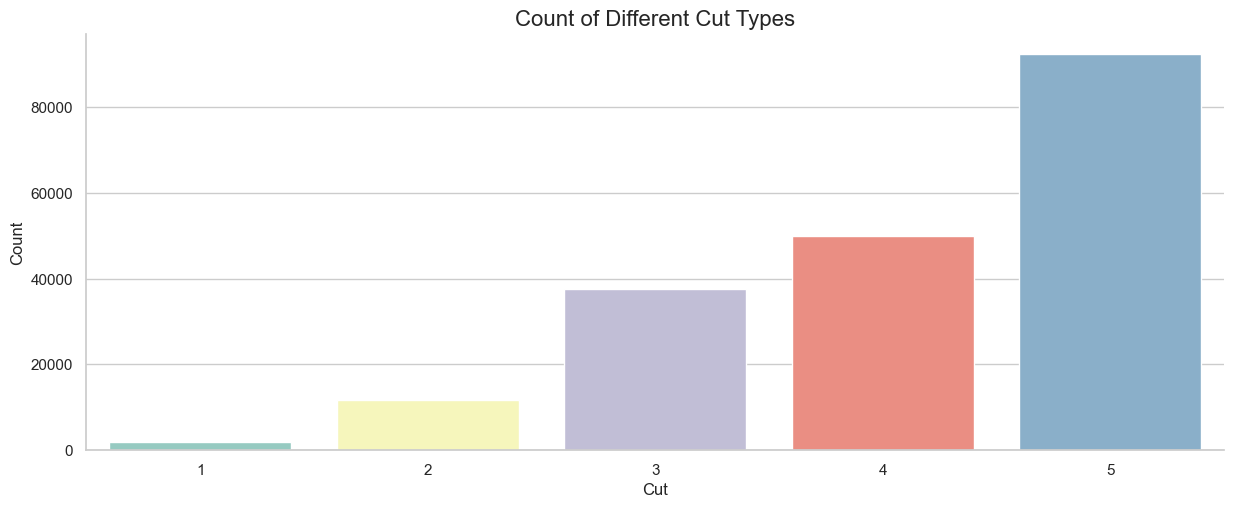

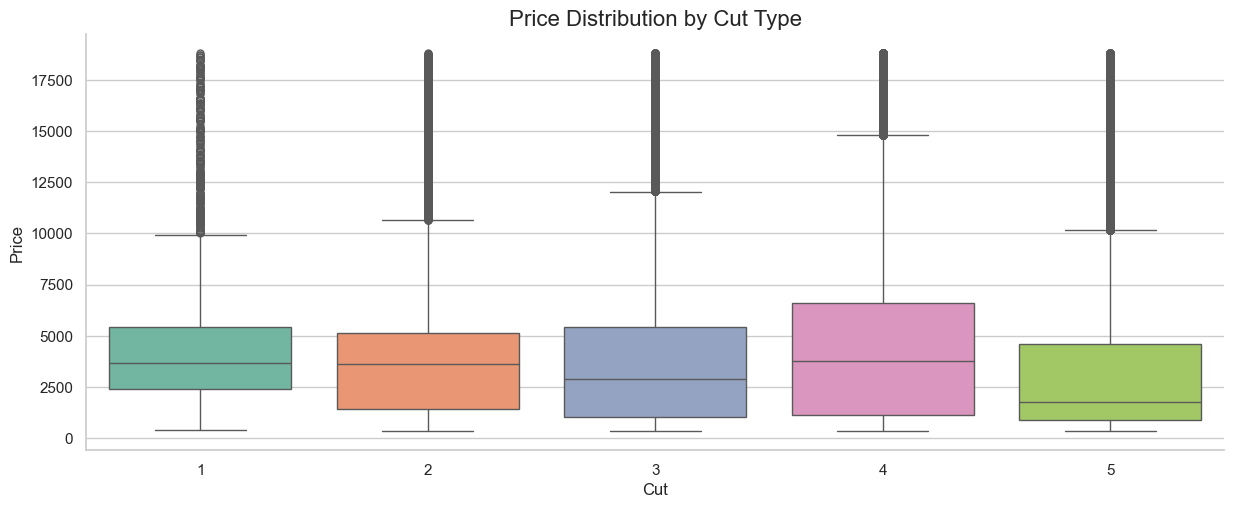

In [147]:

# Count plot for 'cut'
sns.catplot(x="cut", data=df, kind="count", aspect=2.5, palette='Set3')
plt.title('Count of Different Cut Types', fontsize=16)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Box plot for 'cut' vs 'price'
sns.catplot(x="cut", y="price", kind="box", data=df, aspect=2.5, palette='Set2')
plt.title('Price Distribution by Cut Type', fontsize=16)
plt.xlabel('Cut', fontsize=12)
plt.ylabel('Price', fontsize=12)

# Show the plots
plt.show()


- Ideal cut has the highest count with Premium cut being the most expensive

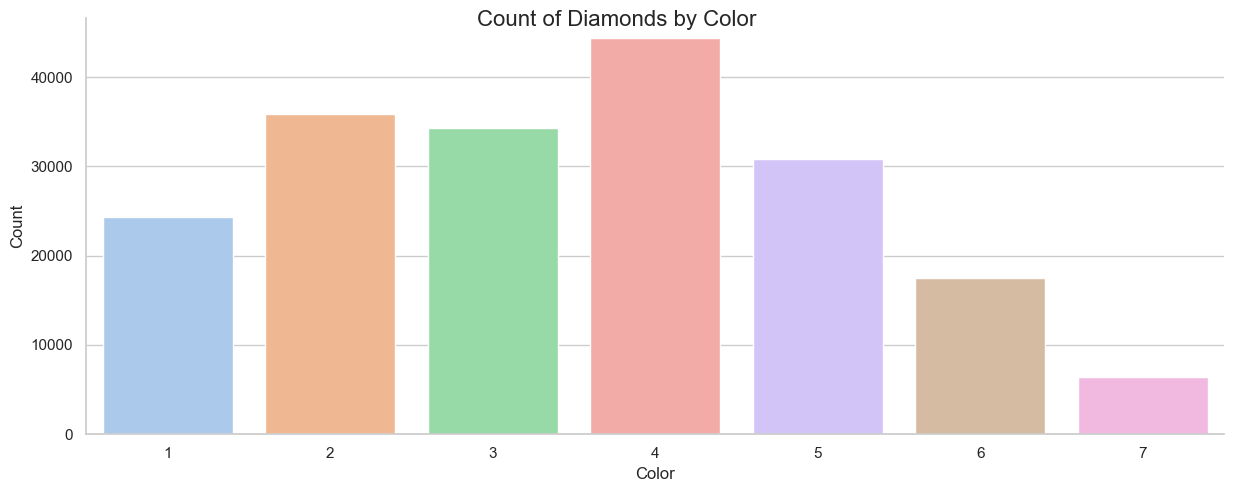

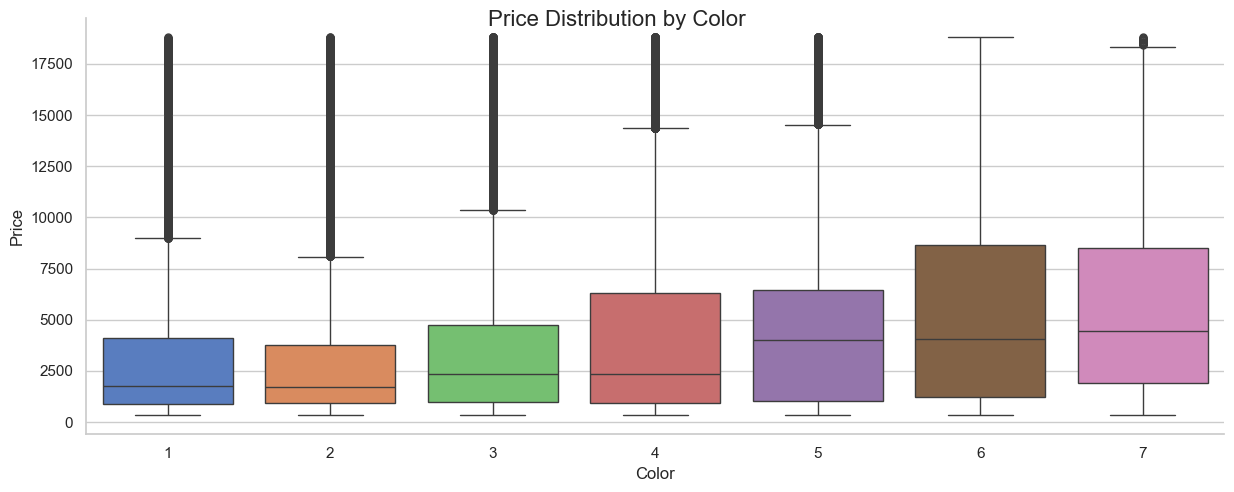

In [148]:

# Set a Seaborn theme for consistency
sns.set_theme(style="whitegrid")

# Count plot for 'color'
count_plot = sns.catplot(x="color", data=df, kind="count", aspect=2.5, palette='pastel')
count_plot.fig.suptitle('Count of Diamonds by Color', fontsize=16)
count_plot.set_axis_labels('Color', 'Count')
count_plot.set_titles('')

# Box plot for 'color' vs 'price'
box_plot = sns.catplot(x="color", y="price", kind="box", data=df, aspect=2.5, palette='muted')
box_plot.fig.suptitle('Price Distribution by Color', fontsize=16)
box_plot.set_axis_labels('Color', 'Price')
box_plot.set_titles('')

# Show the plots
plt.show()


- G color has the highest count with J color being the most expensive.

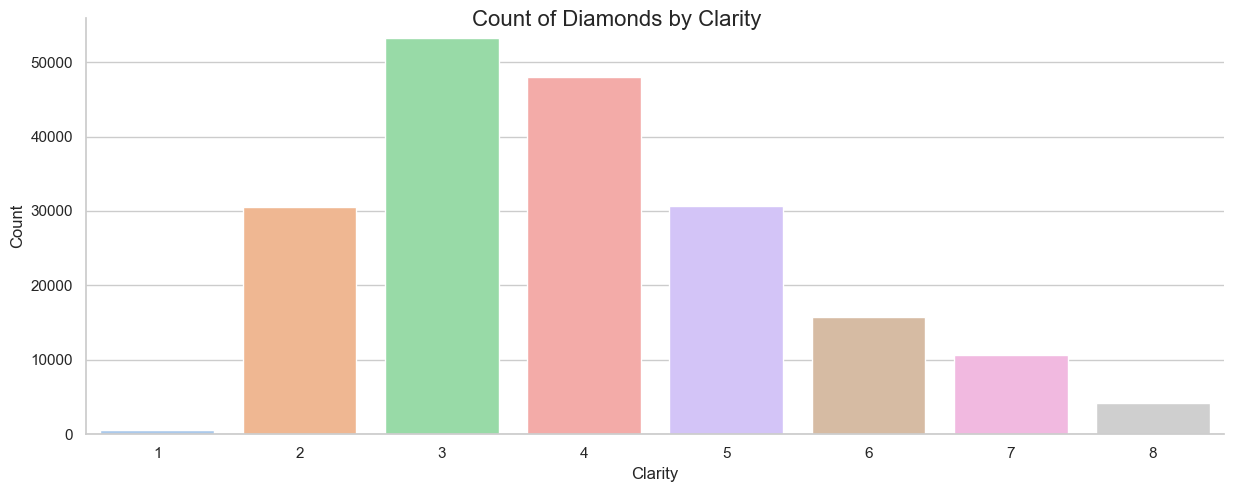

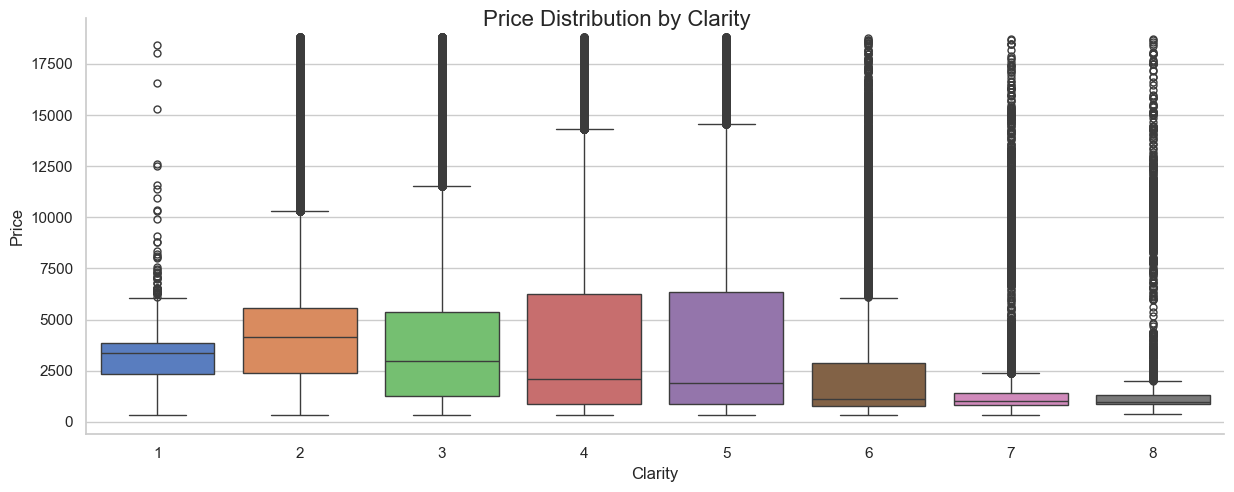

In [149]:

# Set a Seaborn theme for consistency
sns.set_theme(style="whitegrid")

# Count plot for 'clarity'
count_plot = sns.catplot(x="clarity", data=df, kind="count", aspect=2.5, palette='pastel')
count_plot.fig.suptitle('Count of Diamonds by Clarity', fontsize=16)
count_plot.set_axis_labels('Clarity', 'Count')
count_plot.set_titles('')

# Box plot for 'clarity' vs 'price'
box_plot = sns.catplot(x="clarity", y="price", kind="box", data=df, aspect=2.5, palette='muted')
box_plot.fig.suptitle('Price Distribution by Clarity', fontsize=16)
box_plot.set_axis_labels('Clarity', 'Price')
box_plot.set_titles('')

# Show the plots
plt.show()


- SI1 clarity has the highest count with VS1 & VS2 being the most expensive

# Model Training + Pipeline + Feature Scaling + TrainTestSplit

#### Feature Scaling 
Feature scaling is a preprocessing step commonly used in machine learning to standardize or normalize the features of a dataset. It helps to ensure that all features are on a similar scale, which can be beneficial for many machine learning algorithms.

Standardization transforms the data so that it has zero mean and unit variance. It subtracts the mean of each feature and divides by its standard deviation. This technique does not bound the values to a specific range.
#### TrainTestSplit
It is common practice to split your dataset into a training set and a test set. The training set is used to train your model, while the test set is used to evaluate its performance on unseen data.
#### Pipeline
pipeline is a convenient way to chain multiple data preprocessing steps and machine learning algorithms together. The scikit-learn library provides the Pipeline class, which allows you to define and execute a sequence of transformations and estimators in a systematic manner.


In [150]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [151]:
## Independent and dependent features
df = pd.read_csv('E:/first/data/gemstone.csv')
df=df.drop(['id'],axis=1)
X = df.drop(['price'],axis=1)
Y = df[['price']]

In [152]:
# Segregating numerical and categorical variables
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [153]:
print(numerical_cols)
print(categorical_cols)

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [154]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

# Pipeline

In [155]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('remove_features', FunctionTransformer((lambda X: X.drop(['x', 'y', 'z'], axis=1)), validate=False)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]
)

# Categorigal Pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories])),
        ('scaler', StandardScaler())
    ]
)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

## Train Test Split

In [156]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)


In [157]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=[['carat', 'depth', 'table', 'cut', 'color', 'clarity']])
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=[['carat', 'depth', 'table', 'cut', 'color', 'clarity']])

In [158]:
X_train.head()

,carat,depth,table,cut,color,clarity
0,-0.975439,-0.849607,-0.121531,0.874076,1.528722,1.352731
1,0.235195,1.833637,-0.121531,-2.144558,-0.935071,-0.646786
2,0.494617,0.815855,0.399800,-0.132136,0.296826,0.686225
3,-1.018676,0.260701,0.921131,-0.132136,0.296826,0.019720
4,-0.953821,-0.664555,-0.642862,0.874076,2.144670,1.352731


In [159]:
X_test.head()

,carat,depth,table,cut,color,clarity
0,-0.564688,-0.942132,-0.642862,-0.132136,-0.935071,0.019720
1,-0.175556,1.000906,-0.121531,-1.138347,0.912774,-0.646786
2,-1.061913,0.260701,-0.121531,0.874076,0.912774,2.685743
3,0.970223,-0.201927,1.963794,-0.132136,0.296826,0.019720
4,-0.932202,-1.312235,0.399800,-0.132136,-0.935071,0.686225


# MOdel Training

In [160]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [161]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [162]:
## Train multiple models
## Model Ecaluation
models={
    'Decision Tree' :DecisionTreeRegressor(),
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'KNN':KNeighborsRegressor(),
    'XGB':XGBRegressor(),
    'RandomForest':RandomForestRegressor(),
    'Adaboost':AdaBoostRegressor(),
    'Gradientboost':GradientBoostingRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score for test",r2_square*100)
    print("R2 score for train", r2_score(y_train, model.predict(X_train))*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

Decision Tree
Model Training Performance
RMSE: 824.2104034582547
MAE: 417.12356858588805
R2 score for test 95.82963173287169
R2 score for train 99.83697395085885


LinearRegression
Model Training Performance
RMSE: 1099.6943843143683
MAE: 806.3805022561626
R2 score for test 92.57592692715887
R2 score for train 92.52748141456539


Lasso
Model Training Performance
RMSE: 1099.7070571865745
MAE: 806.0476384650289
R2 score for test 92.57575581621613
R2 score for train 92.52742700593768


Ridge
Model Training Performance
RMSE: 1099.6945713391974
MAE: 806.3751566214526
R2 score for test 92.57592440193709
R2 score for train 92.52748140478235


Elasticnet
Model Training Performance
RMSE: 1831.6608029990891
MAE: 1239.997199611824
R2 score for test 79.40374184126587
R2 score for train 79.36759398085745


KNN
Model Training Performance
RMSE: 724.1472091506897
MAE: 395.9440900950545
R2 score for test 96.7807704482506
R2 score for train 97.84823635094692


XGB
Model Training Performance
RMSE: 587.596

In [163]:
model_list

['Decision Tree',
 'LinearRegression',
 'Lasso',
 'Ridge',
 'Elasticnet',
 'KNN',
 'XGB',
 'RandomForest',
 'Adaboost',
 'Gradientboost']

In [164]:
r2_list

[0.9582963173287169,
 0.9257592692715888,
 0.9257575581621613,
 0.9257592440193708,
 0.7940374184126587,
 0.9678077044825061,
 0.978803901839602,
 0.9748544537518533,
 0.9053573291999066,
 0.9764213525858482]

In [165]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
6,XGB,0.978804
9,Gradientboost,0.976421
7,RandomForest,0.974854
5,KNN,0.967808
0,Decision Tree,0.958296
1,LinearRegression,0.925759
3,Ridge,0.925759
2,Lasso,0.925758
8,Adaboost,0.905357
4,Elasticnet,0.794037


In [166]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object